In [1]:
import os
import yaml
import pickle as pkl
import netCDF4 as nc4

import numpy as np
import xarray as xr
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.cluster import KMeans
from datetime import date
import random

from src.utils import save_name
from src.utils import reload_config
import src.data_preparation.load_data as load_data

import src.utils.tardisml_utils as tardisml_utils
rootdir = tardisml_utils.get_rootdir()

In [2]:
n_clusters = 40

# idir = '/nird/projects/nird/NS2993K/Leo/results/xgb_230130-135907/ml/'
idir = f'{rootdir}Leo/results/kmean/'

ifile = f'Kmean_n{n_clusters}_2011_2019.nc'

In [3]:
nc = nc4.Dataset(f'{idir}{ifile}', mode='r')
km_xr = xr.open_dataset(xr.backends.NetCDF4DataStore(nc))['km']

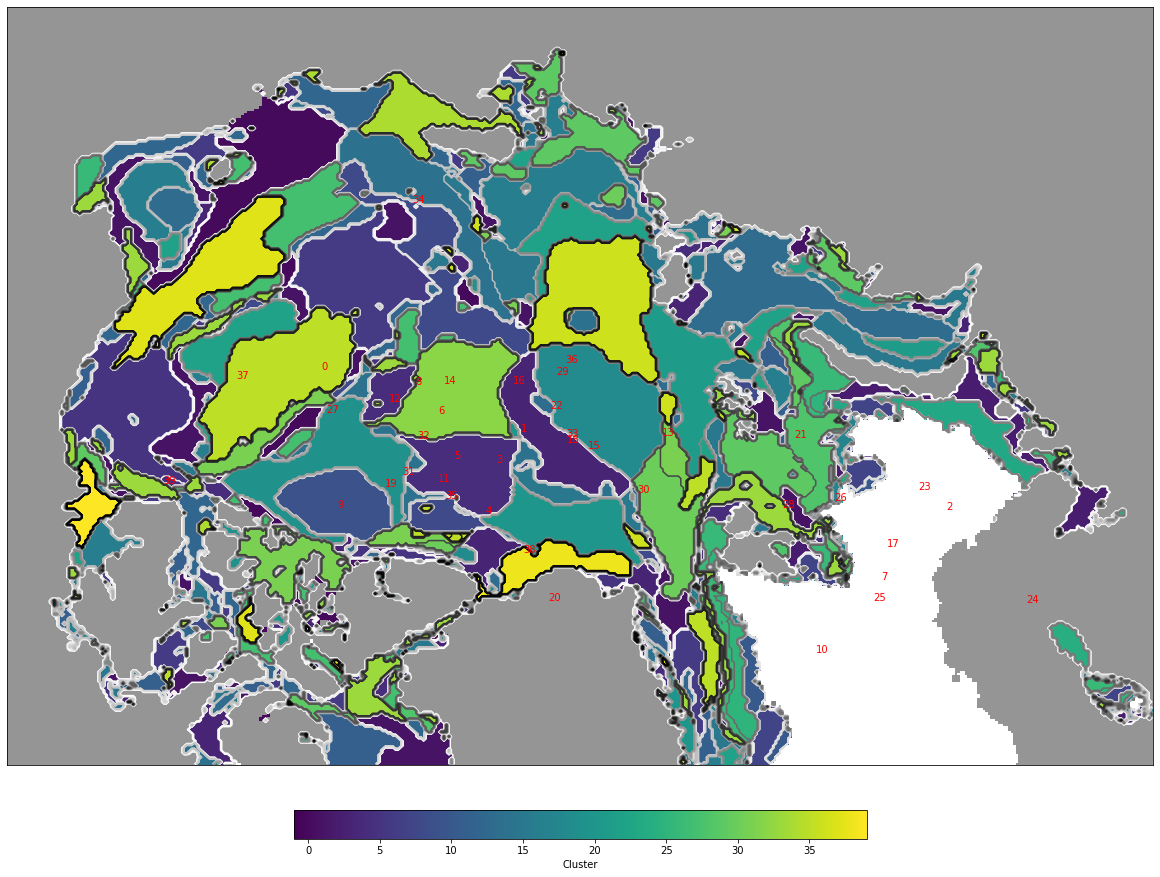

In [123]:
draw_clusters(km=km_xr, centre_clusters=centroids)

In [58]:
x = km_xr.where(km_xr==1).x
y = km_xr.where(km_xr==1).y

In [59]:
centroid = (y.mean(), x.mean())

In [92]:
xx = [km_xr.where(km_xr==n, drop=True).x.mean().data for n in range(n_clusters)]

In [94]:
yy = [km_xr.where(km_xr==n, drop=True).y.mean().data for n in range(n_clusters)]

In [97]:
np.array(xx)

array([-10.138771  ,  -0.35980904,  20.535715  ,  -1.5689656 ,
        -2.1016128 ,  -3.626506  ,  -4.4265776 ,  17.31322   ,
        -5.5294585 ,  -9.359694  ,  14.131411  ,  -4.4       ,
        -6.849359  ,   6.588362  ,  -4.133108  ,   2.9492064 ,
        -0.7319652 ,  17.634869  ,   1.9137931 ,  -7.0490656 ,
         0.97836536,  13.048544  ,   1.1114719 ,  19.166666  ,
        24.4375    ,  16.959677  ,  15.05388   ,  -9.908058  ,
        12.488938  ,   1.3856784 ,   5.3814936 ,  -6.1802883 ,
        -5.435811  ,   1.8784602 ,  -5.6875    ,  -4.067953  ,
         1.8505435 , -14.339063  ,  -0.21547619, -17.893518  ],
      dtype=float32)

In [118]:
centroids = np.array(xx), np.array(yy)

In [119]:
centroids

(array([-10.138771  ,  -0.35980904,  20.535715  ,  -1.5689656 ,
         -2.1016128 ,  -3.626506  ,  -4.4265776 ,  17.31322   ,
         -5.5294585 ,  -9.359694  ,  14.131411  ,  -4.4       ,
         -6.849359  ,   6.588362  ,  -4.133108  ,   2.9492064 ,
         -0.7319652 ,  17.634869  ,   1.9137931 ,  -7.0490656 ,
          0.97836536,  13.048544  ,   1.1114719 ,  19.166666  ,
         24.4375    ,  16.959677  ,  15.05388   ,  -9.908058  ,
         12.488938  ,   1.3856784 ,   5.3814936 ,  -6.1802883 ,
         -5.435811  ,   1.8784602 ,  -5.6875    ,  -4.067953  ,
          1.8505435 , -14.339063  ,  -0.21547619, -17.893518  ],
       dtype=float32),
 array([  3.8606021 ,   0.5221631 ,  -3.7141304 ,  -1.1549044 ,
         -3.9406934 ,  -0.9671533 ,   1.4988263 ,  -7.527174  ,
          3.0850904 ,  -3.594697  , -11.460616  ,  -2.1953552 ,
          2.168545  ,   0.28395063,   3.095553  ,  -0.40392157,
          3.1002748 ,  -5.7266665 ,  -0.0617284 ,  -2.4711537 ,
         -8.6304

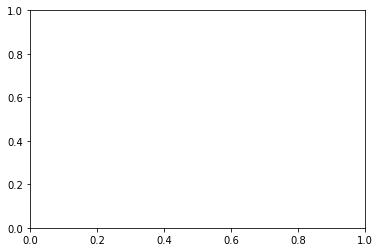

In [116]:
for idx, (x,y) in enumerate(zip(centroids[0], centroids[1])):
        plt.annotate(str(idx), xy=(y, x), xycoords='data', color='r')

In [122]:
# plot all clusters with style (and easy to read)


def draw_clusters(km, centre_clusters, savefig=False, showfig=True, odir=''):
    '''
    '''
    
    n_clusters= int(km.max())
    
    fig, ax = plt.subplots(figsize=(16,12), constrained_layout=True)
    imC = km.plot(ax=ax, vmin=-1, vmax=n_clusters, add_colorbar=False)
    km.where(km==-1).plot(ax=ax, cmap=plt.cm.Greys, add_colorbar=False)
    km.where(km<-1).plot(ax=ax, cmap=plt.cm.Greys, add_colorbar=False, vmin = -999, vmax=-100)
    
    
    levels = np.arange(0, km.max(), 1)
    # contour need an int
    cl = km.plot.contour(ax=ax, levels=levels, vmin=0, vmax=km.max(), add_colorbar=False, cmap=plt.get_cmap('Greys'))
    #ax.clabel(cl, fontsize=18, inline=1, rightside_up=True, inline_spacing=20)
    
    
    fig.colorbar(imC, ax=ax, label='Cluster', extend='neither', shrink=0.5, location="bottom")

    for idx, (x,y) in enumerate(zip(centroids[0], centroids[1])):
        plt.annotate(str(idx), xy=(x, y), xycoords='data', color='r')

    ax.set_xlabel('')
    ax.set_ylabel('')
    ax.tick_params(labelbottom=False, labelleft=False, bottom=False, left=False)
    
    if savefig:
        ofile = f'{odir}Kmeans_clusters.png'
        plt.savefig(f"{ofile}", dpi=124, facecolor='white')
        print(f'Saved as : {ofile}')
    
    if showfig:
        plt.show()
    
    plt.close()        

    